This dataset is a collection of passenger reviews on Austrian Airlines.
Link to the dataset: https://www.kaggle.com/datasets/kamyababedi/austrian-airlines?resource=download

The goal of this notebook is to explore the dataset to gain some insights about what customers like and dislike about Austrian Airlines.
Furthermore, we want to generate recommendations from customer reviews to improve the service and also generate praise for positive aspects of the service.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('austrian_airlines_reviews.csv')

In [87]:
df.head()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,2024-03-05,1.0,10.0,"""poor ability to communicate policy""",Kristina Gollinger,United States,2024-03-05,The flight was never taken. My review that I...,Family Leisure,Economy Class,Los Angeles to Vienna,May 2023,no,NaN,1.0
1,1,2024-02-28,2.0,10.0,“Austrian dropped the ball”,E Kemp,United States,2024-02-28,I just returned from a 2 weeks trip in Europe...,Solo Leisure,Business Class,Vienna to Paris CDG,February 2024,no,NaN,1.0
2,2,2024-01-16,1.0,10.0,"""an arduous experience""",Sonia Ashrafpour,Switzerland,2024-01-16,My experience was far from satisfactory. The...,Couple Leisure,Economy Class,Vienna to Bangkok,December 2023,no,NaN,1.0
3,3,2024-01-12,8.0,10.0,"""professional and polite cabin crew""",Karim Fahim,Czech Republic,2024-01-12,"Austrian Airlines are really nice, decent ca...",Solo Leisure,Economy Class,Prague to Cairo via Vienna,December 2023,NaN,NaN,1.0
4,4,2024-01-09,3.0,10.0,“No apology whatsoever”,Thomas Wenn,United Kingdom,2024-01-09,This airline didn't load my baggage onto my o...,Solo Leisure,Economy Class,Bangkok to London Heathrow via Vienna,December 2023,no,NaN,0.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         747 non-null    int64  
 1   Date Published     747 non-null    object 
 2   Rating             730 non-null    float64
 3   Max Rating         730 non-null    float64
 4   Title              747 non-null    object 
 5   Author             747 non-null    object 
 6   Country            746 non-null    object 
 7   Date               747 non-null    object 
 8   Review Body        747 non-null    object 
 9   Type Of Traveller  488 non-null    object 
 10  Seat Type          747 non-null    object 
 11  Route              488 non-null    object 
 12  Date Flown         486 non-null    object 
 13  Recommended        408 non-null    object 
 14  Aircraft           249 non-null    object 
 15  Verified           325 non-null    float64
dtypes: float64(3), int64(1), o

In [89]:
df.describe()

,Unnamed: 0,Rating,Max Rating,Verified
count,747.000000,730.000000,730.0,325.000000
mean,373.000000,4.997260,10.0,0.846154
std,215.784615,3.364463,0.0,0.361358
min,0.000000,1.000000,10.0,0.000000
25%,186.500000,1.000000,10.0,1.000000
50%,373.000000,5.000000,10.0,1.000000
75%,559.500000,8.000000,10.0,1.000000
max,746.000000,10.000000,10.0,1.000000


<Axes: ylabel='count'>

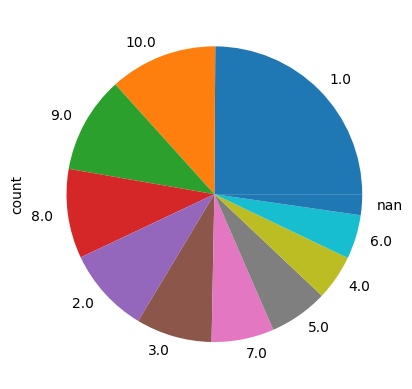

In [90]:
df['Rating'].value_counts(dropna=False).plot(kind='pie')

<Axes: xlabel='Country'>

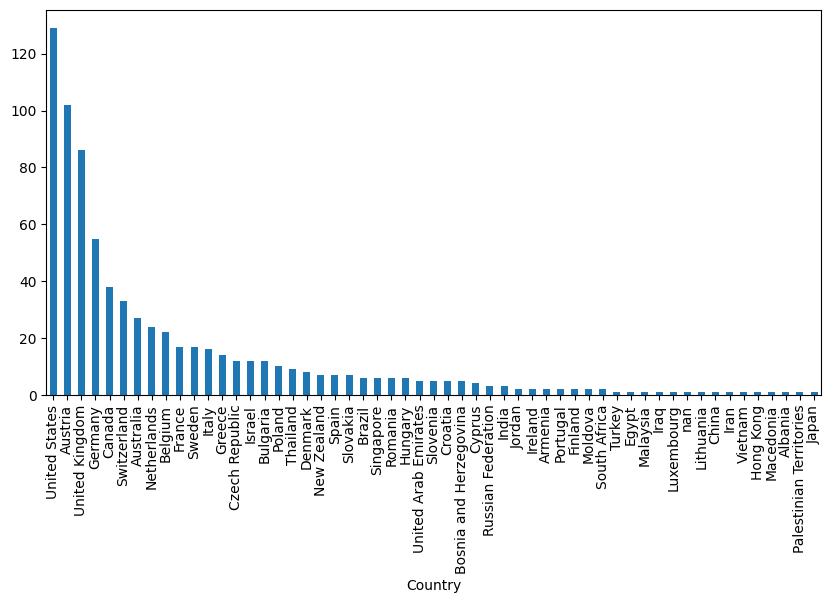

In [91]:
df['Country'].value_counts(dropna=False).plot(kind='bar', figsize=(10, 5))

<Axes: ylabel='count'>

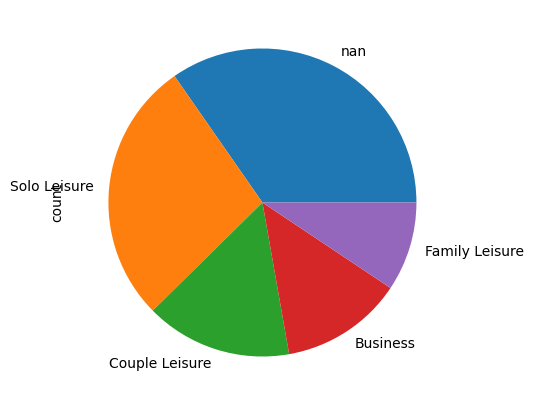

In [92]:
df['Type Of Traveller'].value_counts(dropna=False).plot(kind='pie', figsize=(10, 5))

<Axes: ylabel='count'>

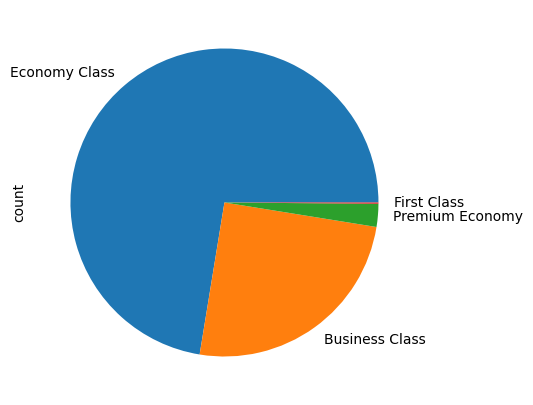

In [93]:
df['Seat Type'].value_counts(dropna=False).plot(kind='pie', figsize=(10, 5))

We can drop some non-informative columns.

In [94]:
df.drop('Max Rating', axis=1, inplace=True)
df.drop('Verified', axis=1, inplace=True)
df.drop('Author', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     747 non-null    object 
 1   Rating             730 non-null    float64
 2   Title              747 non-null    object 
 3   Country            746 non-null    object 
 4   Date               747 non-null    object 
 5   Review Body        747 non-null    object 
 6   Type Of Traveller  488 non-null    object 
 7   Seat Type          747 non-null    object 
 8   Route              488 non-null    object 
 9   Date Flown         486 non-null    object 
 10  Recommended        408 non-null    object 
 11  Aircraft           249 non-null    object 
dtypes: float64(1), object(11)
memory usage: 70.2+ KB


Date Published is a duplicate column of Date.

In [96]:
df.drop('Date Published', axis=1, inplace=True)

Only a third of the data has a value for Aircraft, imputation makes not much sense.

In [97]:
df.drop('Aircraft', axis=1, inplace=True)

Now we transform the route column into two separate columns for the origin and destination. The route is provided in the format "origin to destination via stopover". After splitting into two columns, we can drop the original route column and remove the stopover from the route.

In [98]:
df[['Origin', 'Destination']] = df['Route'].str.split(' to ', expand=True)
df['Destination'] = df['Destination'].str.replace(' via .*', '', regex=True)

df[['Origin', 'Destination']]

,Origin,Destination
0,Los Angeles,Vienna
1,Vienna,Paris CDG
2,Vienna,Bangkok
3,Prague,Cairo
4,Bangkok,London Heathrow
...,...,...
742,NaN,NaN
743,NaN,NaN
744,NaN,NaN
745,NaN,NaN


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             730 non-null    float64
 1   Title              747 non-null    object 
 2   Country            746 non-null    object 
 3   Date               747 non-null    object 
 4   Review Body        747 non-null    object 
 5   Type Of Traveller  488 non-null    object 
 6   Seat Type          747 non-null    object 
 7   Date Flown         486 non-null    object 
 8   Recommended        408 non-null    object 
 9   Origin             488 non-null    object 
 10  Destination        486 non-null    object 
dtypes: float64(1), object(10)
memory usage: 64.3+ KB


The recommended column only has 'no' or NaN values. The question now is if the NaN values are equivalent to 'yes' or if they are missing values. We can check this by looking at the correlation between the rating and the recommended column.

<Axes: ylabel='count'>

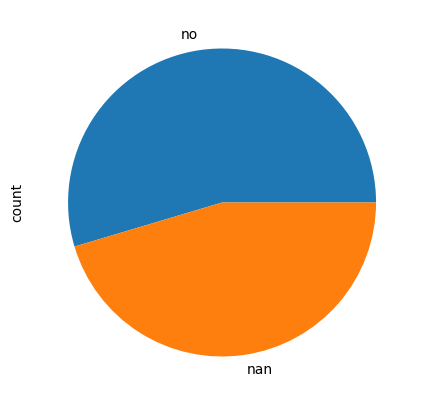

In [100]:
df['Recommended'].value_counts(dropna=False).plot(kind='pie', figsize=(10, 5))

In [101]:
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(index=df['Rating'],columns=df['Recommended'].fillna('NaN').map({'NaN': 1, 'no': 0}))
cross_tab

Recommended,0,1
Rating,,
1.0,185,1
2.0,69,1
3.0,62,0
4.0,34,3
5.0,24,24
6.0,13,23
7.0,3,48
8.0,1,72
9.0,0,79


In [102]:
chi_sq_result = chi2_contingency(cross_tab,)
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
 
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")

The p-value is 2.0681335085099824e-126 and hence we reject the null Hpothesis with 9 degrees of freedom


We can remove the recommended column.

In [103]:
df.drop('Recommended', axis=1, inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             730 non-null    float64
 1   Title              747 non-null    object 
 2   Country            746 non-null    object 
 3   Date               747 non-null    object 
 4   Review Body        747 non-null    object 
 5   Type Of Traveller  488 non-null    object 
 6   Seat Type          747 non-null    object 
 7   Date Flown         486 non-null    object 
 8   Origin             488 non-null    object 
 9   Destination        486 non-null    object 
dtypes: float64(1), object(9)
memory usage: 58.5+ KB
